In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier


## To split datasets in training and testing 
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_auc_score

from sklearn.feature_selection import VarianceThreshold

In [13]:
app_train=pd.read_csv('application_train.csv')
app_test=pd.read_csv('application_test.csv')


In [8]:
#bureau_balance=pd.read_csv('bureau_balance.csv')



In [9]:
#credit_card_bal=pd.read_csv('credit_card_balance.csv')


In [10]:
#install_pay=pd.read_csv('installments_payments.csv')


In [11]:
#POS_CASH_bal=pd.read_csv('POS_CASH_balance.csv')

In [12]:
#bureau=pd.read_csv('bureau.csv')

In [17]:
app_test.shape

(48744, 121)

In [18]:
app_train.shape

(307511, 122)

In [6]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [109]:
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [ ]:
## fetching the list of number of unique entries in each of the object columns.

In [138]:
col_list=app_train.select_dtypes(include='object').columns
type(col_list)

pandas.core.indexes.base.Index

In [150]:
ser=pd.Series(index=col_list)


In [148]:
for i in col_list:
    ser[i]=app_train[i].nunique()

In [149]:
ser

NAME_CONTRACT_TYPE             2.0
CODE_GENDER                    3.0
FLAG_OWN_CAR                   2.0
FLAG_OWN_REALTY                2.0
NAME_TYPE_SUITE                7.0
NAME_INCOME_TYPE               8.0
NAME_EDUCATION_TYPE            5.0
NAME_FAMILY_STATUS             6.0
NAME_HOUSING_TYPE              6.0
OCCUPATION_TYPE               18.0
WEEKDAY_APPR_PROCESS_START     7.0
ORGANIZATION_TYPE             58.0
FONDKAPREMONT_MODE             4.0
HOUSETYPE_MODE                 3.0
WALLSMATERIAL_MODE             7.0
EMERGENCYSTATE_MODE            2.0
dtype: float64

In [22]:
app_train.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

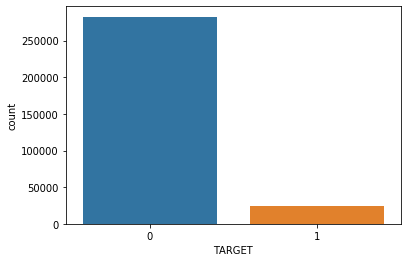

In [21]:

sns.countplot(x='TARGET',data=app_train)

In [94]:
## Checking for missing data in app_train

app_missing=app_train.isnull().sum()
app_missing_per=100*app_train.isnull().sum()/len(app_train)
app_df=pd.concat([app_missing,app_missing_per],axis=1)
app_df.columns=['missing count','percentage missing']

In [95]:
app_df

,missing count,percentage missing
SK_ID_CURR,0,0.000000
TARGET,0,0.000000
NAME_CONTRACT_TYPE,0,0.000000
CODE_GENDER,0,0.000000
FLAG_OWN_CAR,0,0.000000
...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,41519,13.501631
AMT_REQ_CREDIT_BUREAU_WEEK,41519,13.501631
AMT_REQ_CREDIT_BUREAU_MON,41519,13.501631
AMT_REQ_CREDIT_BUREAU_QRT,41519,13.501631


In [73]:
app_missing[app_missing.iloc[:]!=0]

AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
OWN_CAR_AGE                   202929
OCCUPATION_TYPE                96391
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY      41519
AMT_REQ_CREDIT_BUREAU_WEEK     41519
AMT_REQ_CREDIT_BUREAU_MON      41519
AMT_REQ_CREDIT_BUREAU_QRT      41519
AMT_REQ_CREDIT_BUREAU_YEAR     41519
Length: 67, dtype: int64

In [54]:
app_missing.drop(app_missing[app_missing==0].index,inplace=True)

In [57]:
app_missing.sort_values(ascending=False,inplace=True)

In [58]:
app_missing

COMMONAREA_MEDI             214865
COMMONAREA_AVG              214865
COMMONAREA_MODE             214865
NONLIVINGAPARTMENTS_AVG     213514
NONLIVINGAPARTMENTS_MODE    213514
                             ...  
EXT_SOURCE_2                   660
AMT_GOODS_PRICE                278
AMT_ANNUITY                     12
CNT_FAM_MEMBERS                  2
DAYS_LAST_PHONE_CHANGE           1
Length: 67, dtype: int64

In [3]:
## as we have many files to check missing values so created function for the same

def missingvalues(df):
    mis_ser=df.isnull().sum()
    per_miss_ser=100*df.isnull().sum()/len(df)
    miss_df=pd.concat([mis_ser,per_miss_ser],axis=1)
    miss_df.columns=['missing count','percentage missing']
    miss_df=miss_df[miss_df.iloc[:,1]!=0].sort_values(by='percentage missing',ascending=False)
    return miss_df
    

In [4]:
app_train_missing=missingvalues(app_train)

In [5]:
app_train_missing

,missing count,percentage missing
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_MODE,213514,69.432963
...,...,...
EXT_SOURCE_2,660,0.214626
AMT_GOODS_PRICE,278,0.090403
AMT_ANNUITY,12,0.003902
CNT_FAM_MEMBERS,2,0.000650


## DATA ANALYSIS

## Number of males and females

#### Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)


F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64


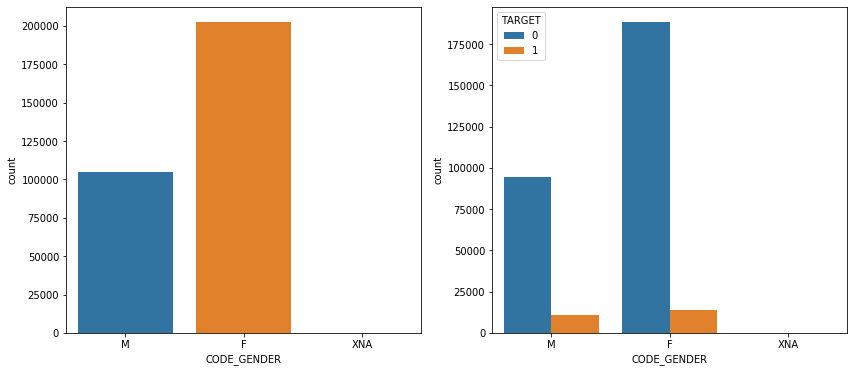

In [12]:
print(app_train['CODE_GENDER'].value_counts())
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.countplot(x='CODE_GENDER', data=app_train)
plt.subplot(1,2,2)
sns.countplot(x='CODE_GENDER', data=app_train,hue='TARGET')

## Who was accompanying client when he was applying for the loan	

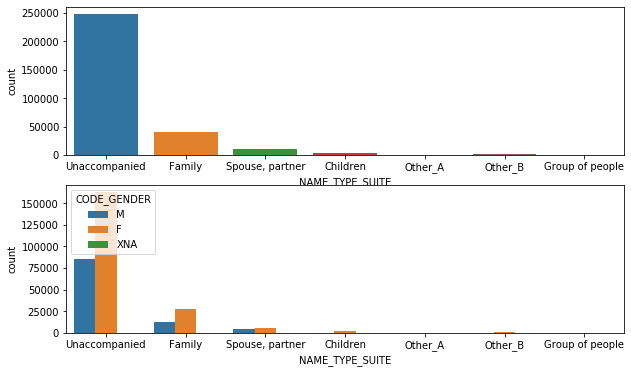

In [15]:
plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
sns.countplot(x='NAME_TYPE_SUITE', data=app_train)
plt.subplot(2,1,2)
sns.countplot(x='NAME_TYPE_SUITE', data=app_train,hue='CODE_GENDER')

### Number of children the client has

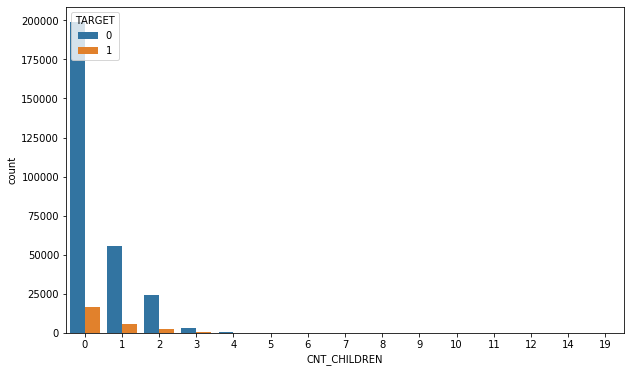

In [32]:
plt.figure(figsize=(10,6))
sns.countplot(x='CNT_CHILDREN',hue='TARGET',data=app_train)

### Conclusion : most people having 0 child have no difficulty in paying loan

## Clients income type (businessman, working, maternity leave,…)	

### prepared count plot in form of bar graph

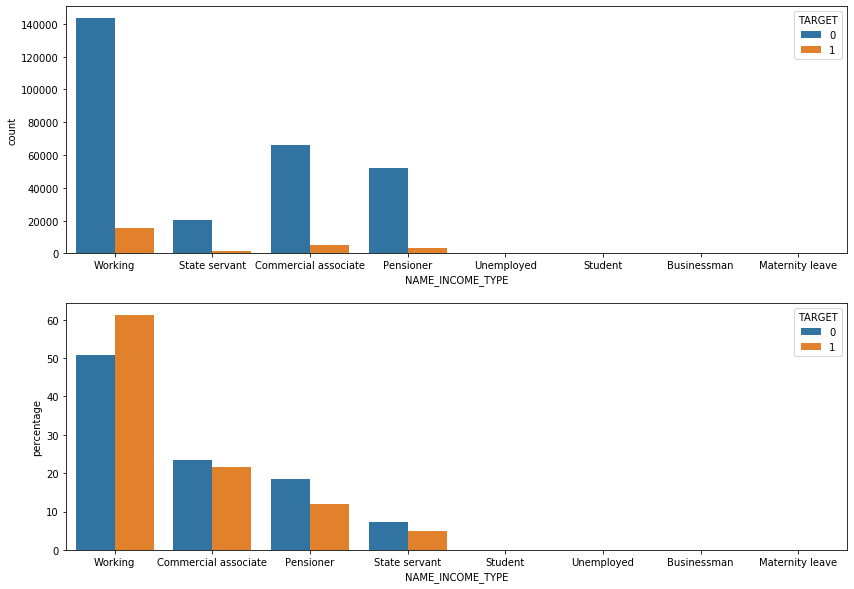

In [29]:
plt.figure(figsize=(14,10))
plt.subplot(2,1,1)
sns.countplot(x='NAME_INCOME_TYPE', data=app_train , hue='TARGET')
plt.subplot(2,1,2)
occupation_counts = (app_train.groupby(['TARGET'])['NAME_INCOME_TYPE']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index())
sns.barplot(x="NAME_INCOME_TYPE", y="percentage", hue="TARGET", data=occupation_counts)

plt.show()

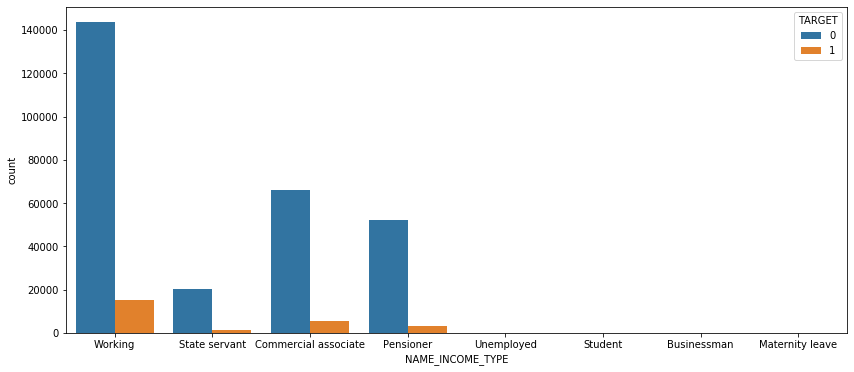

In [54]:
plt.figure(figsize=(14,6))
sns.countplot(x='NAME_INCOME_TYPE', data=app_train , hue='TARGET')


## Level of highest education the client achieved

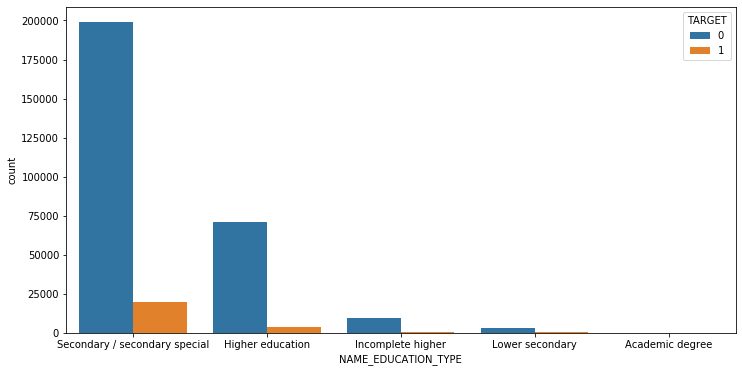

In [87]:
plt.figure(figsize=(12,6))
sns.countplot(x='NAME_EDUCATION_TYPE', data=app_train,hue='TARGET')

## Family status of the client	

[]

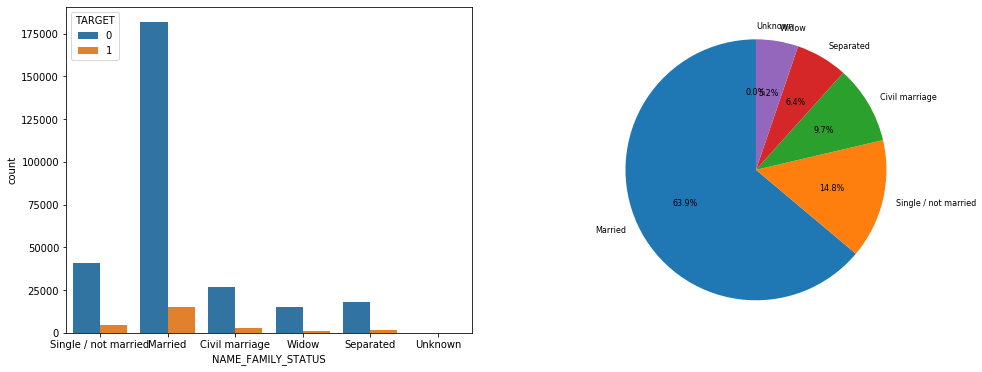

In [88]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.countplot(x='NAME_FAMILY_STATUS', data=app_train,hue='TARGET')

temp = app_train["NAME_FAMILY_STATUS"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
plt.subplot(1,2,2)
plt.pie(df['values'], labels=df['labels'], textprops={'fontsize': 8}, startangle=90, 
       autopct='%1.01f%%')
plt.plot()

## What is the housing situation of the client (renting, living with parents, ...)	

[]

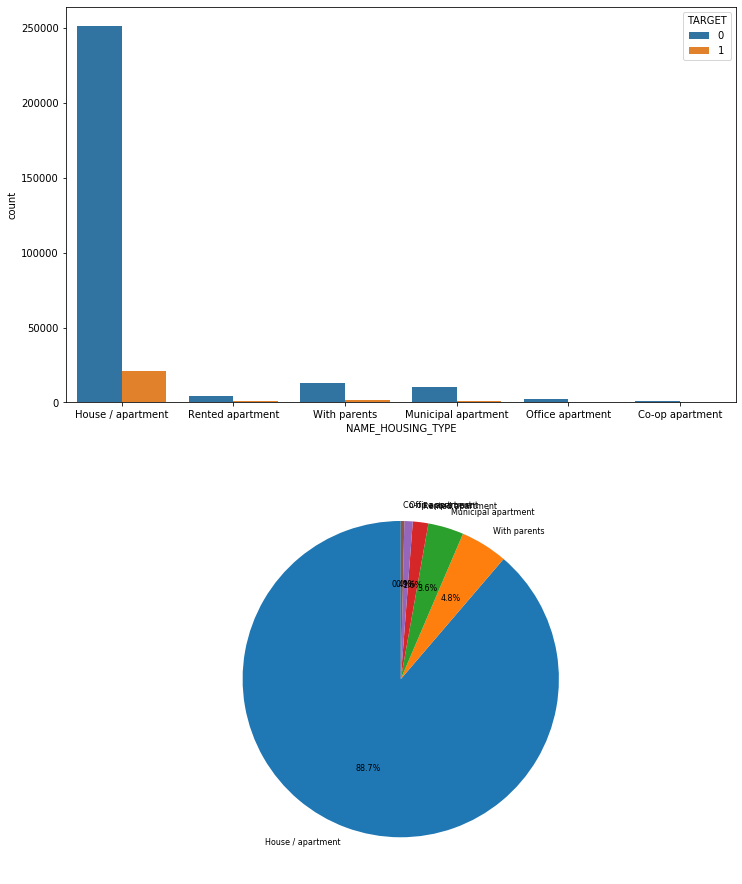

In [89]:
plt.figure(figsize=(12,16))
plt.subplot(2,1,1)
sns.countplot(x='NAME_HOUSING_TYPE', data=app_train,hue='TARGET')


temp = app_train["NAME_HOUSING_TYPE"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
plt.subplot(2,1,2)
plt.pie(df['values'], labels=df['labels'], textprops={'fontsize': 8}, startangle=90, 
       autopct='%1.01f%%')
plt.plot()

## What kind of occupation does the client have	

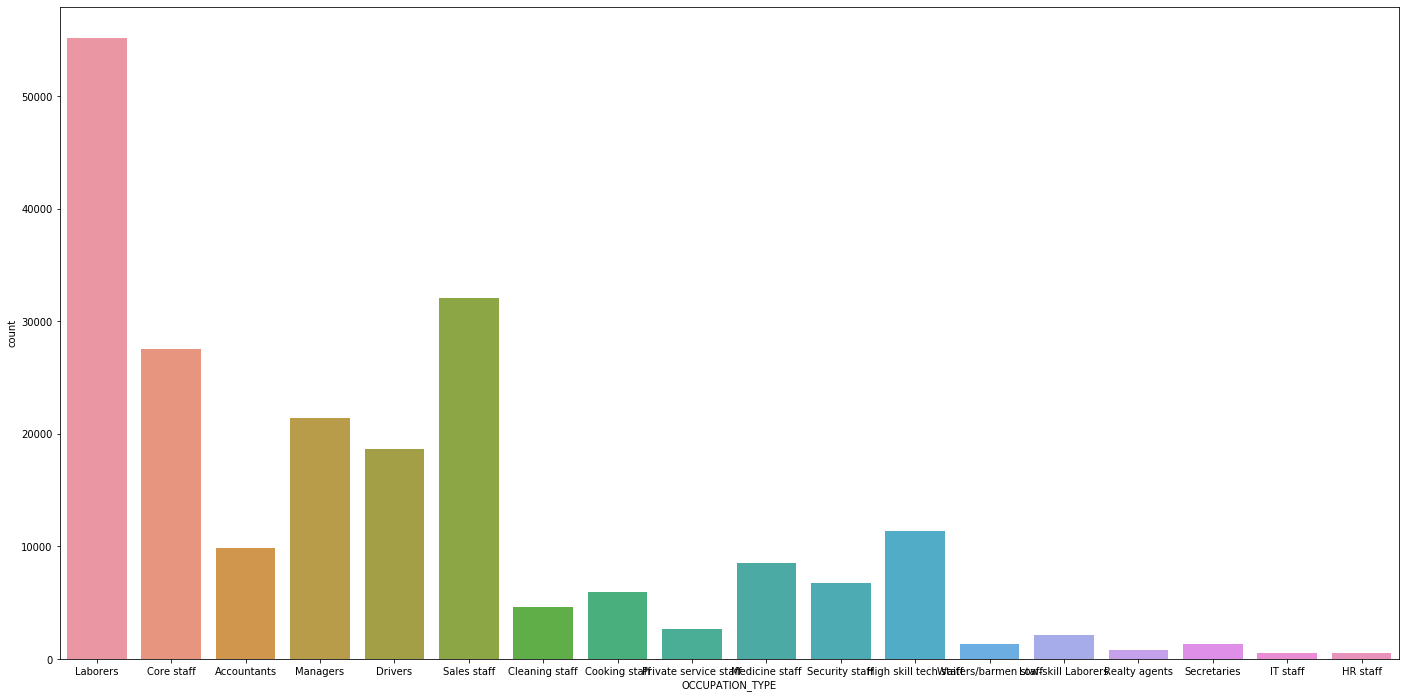

In [112]:
plt.figure(figsize=(24,12))
sns.countplot(x='OCCUPATION_TYPE', data=app_train)

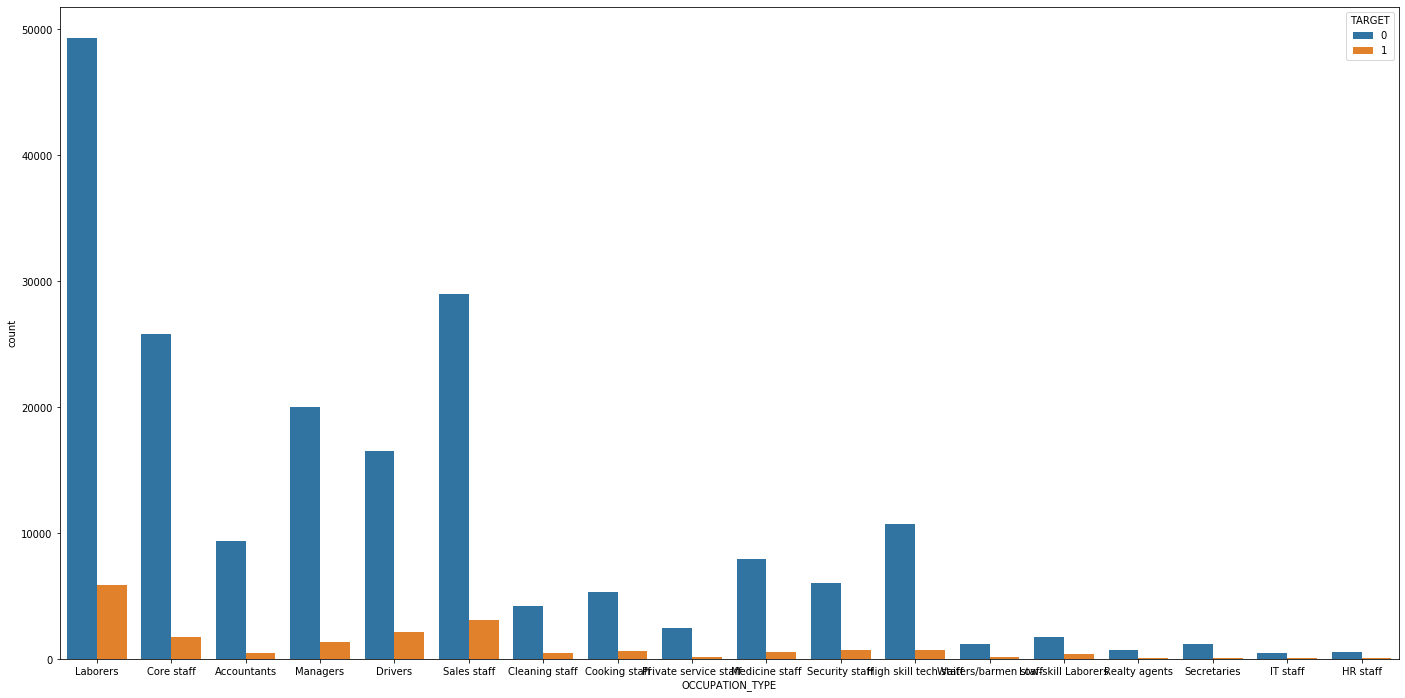

In [90]:
plt.figure(figsize=(24,12))
sns.countplot(x='OCCUPATION_TYPE', data=app_train,hue='TARGET')

## check the occupation which gets more income

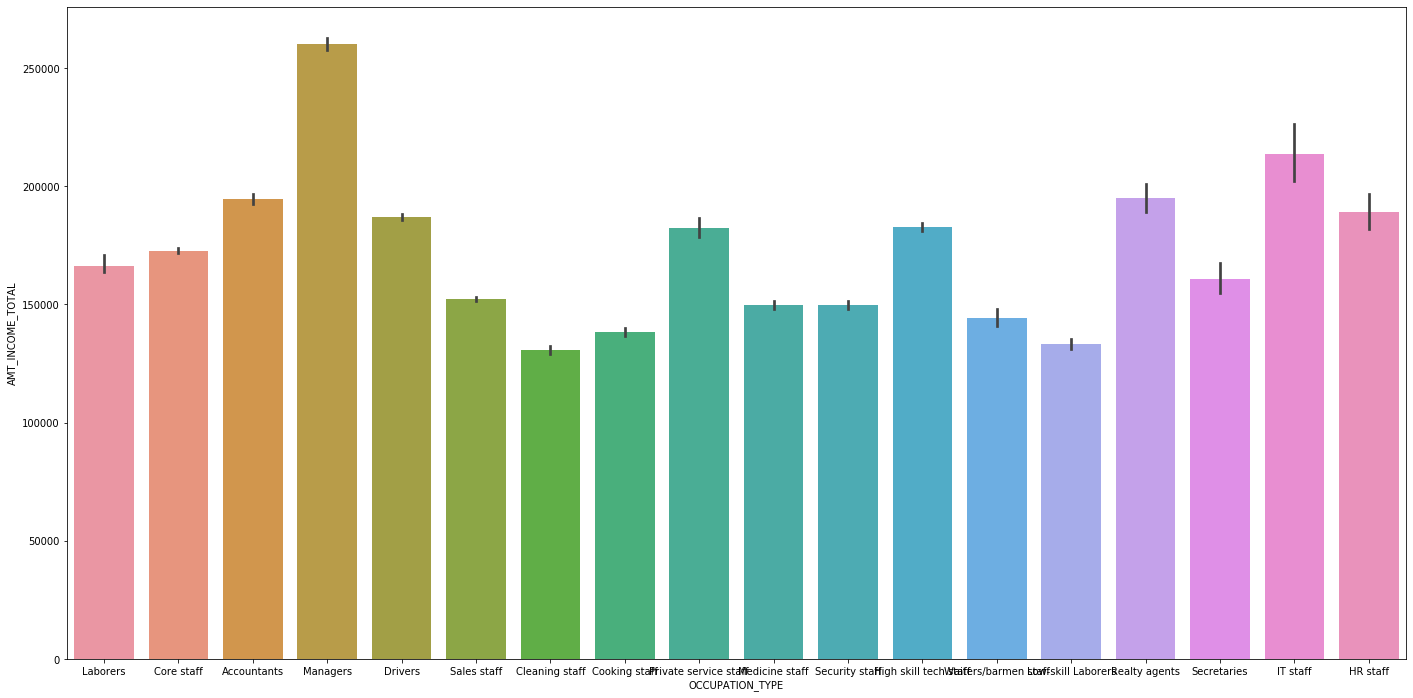

In [36]:
plt.figure(figsize=(24,12))
sns.barplot(x='OCCUPATION_TYPE',y='AMT_INCOME_TOTAL', data=app_train)

#### Conclusion: All occupation have more number of people able to pay Loan but mostly laborers and the least of the clients are IT Staff taking the loans
#### salaries of managers are highest and least is for cleaning staff

## Identification if loan is cash or revolving

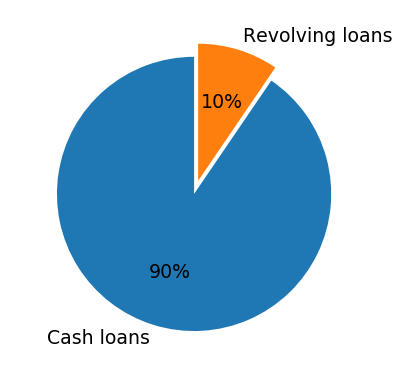

In [18]:
cash_loans = app_train.NAME_CONTRACT_TYPE.value_counts()[0]
rev_loans= app_train.NAME_CONTRACT_TYPE.value_counts()[1]
category_names = ['Cash loans','Revolving loans']
sizes = [cash_loans, rev_loans]

plt.figure(figsize=(2,2), dpi=227)

plt.pie(sizes, labels=category_names, textprops={'fontsize': 6}, startangle=90, 
       autopct='%1.0f%%',explode=[0, 0.1])

plt.show()

## Flag if the client owns a car	

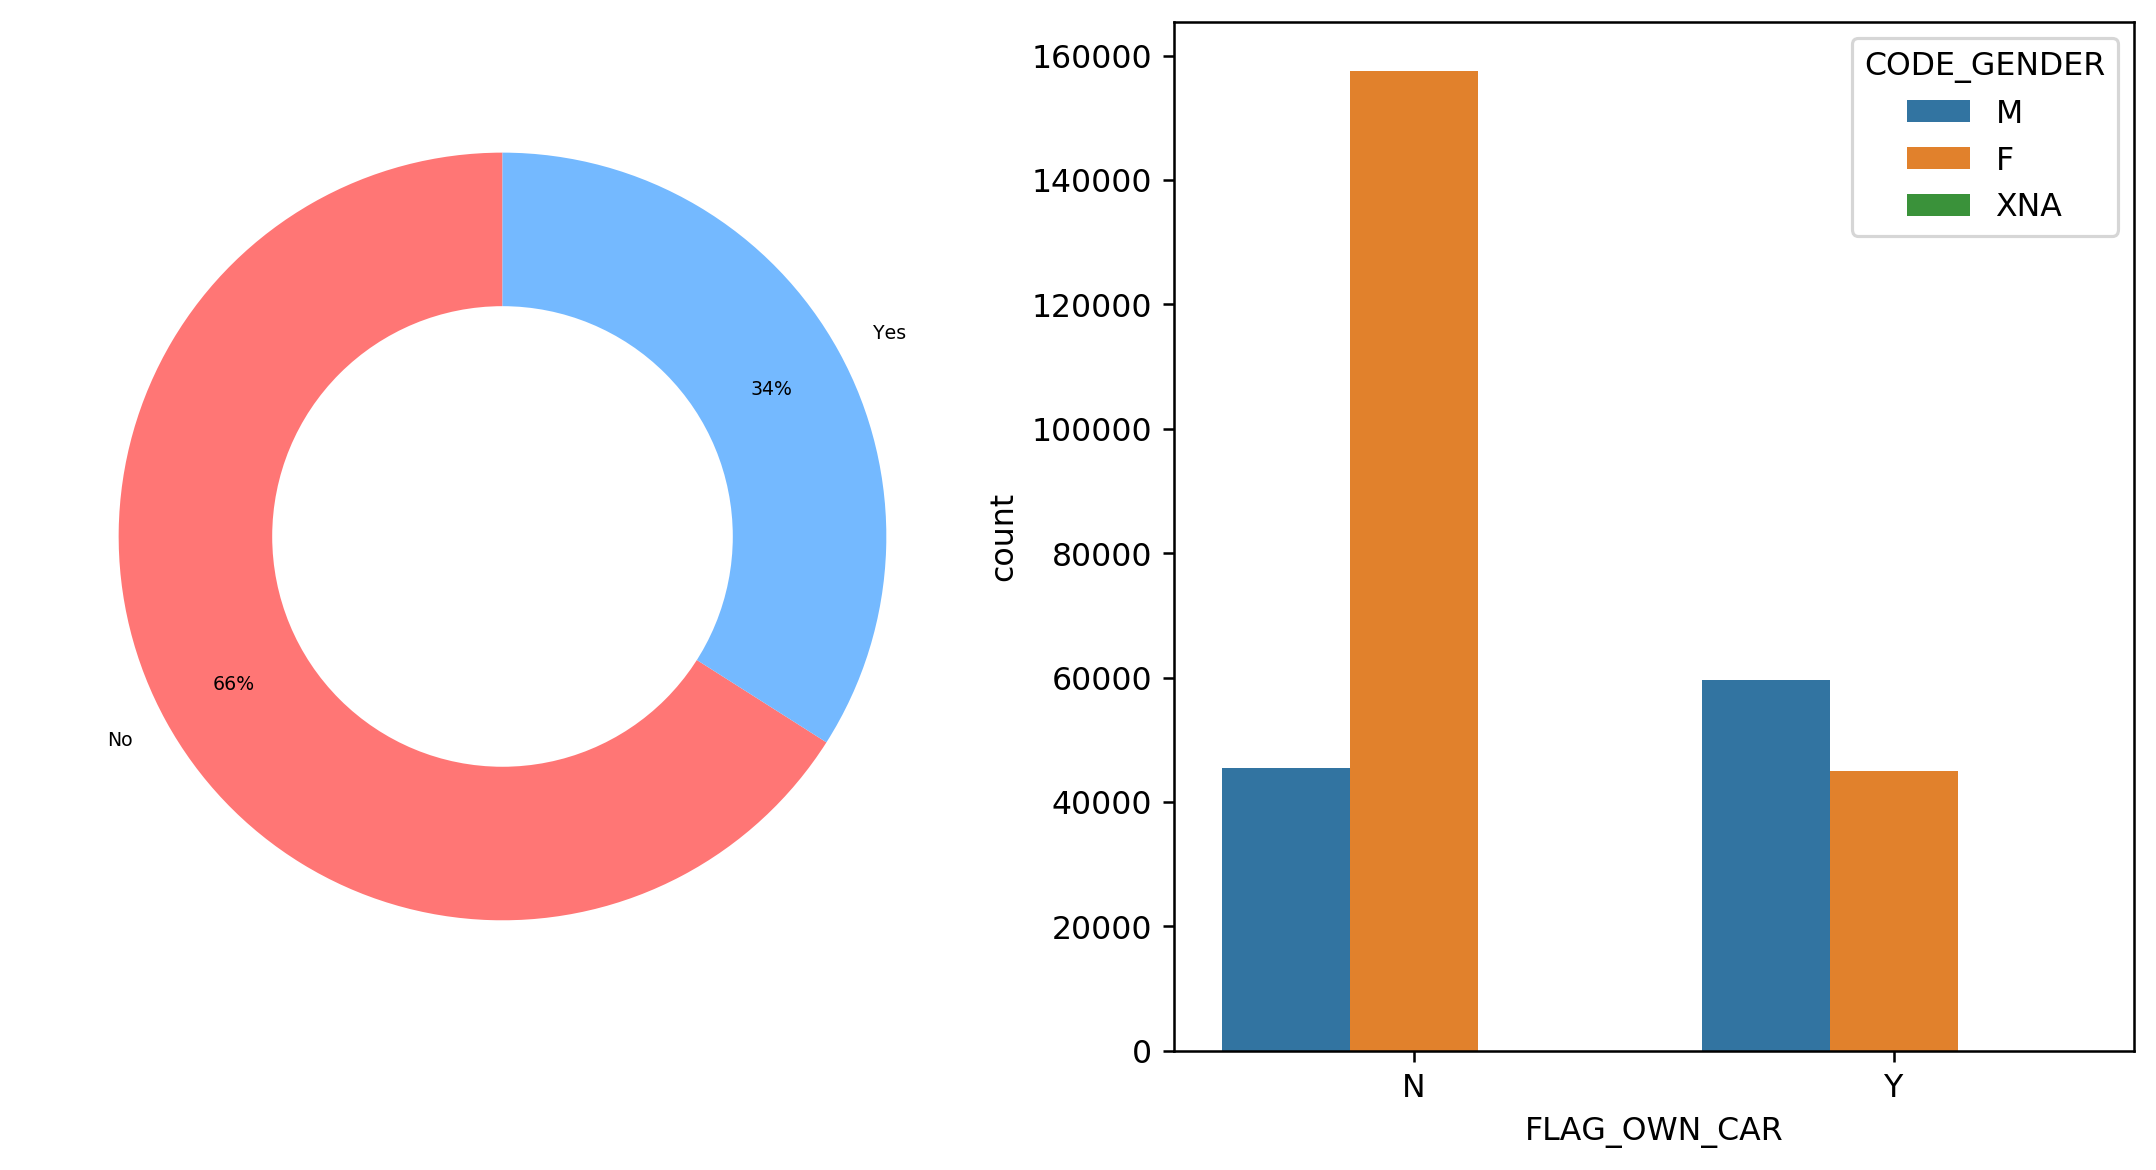

In [20]:

category_names = ['No', 'Yes']
sizes = [app_train.FLAG_OWN_CAR.value_counts()[0], app_train.FLAG_OWN_CAR.value_counts()[1]]
custom_colours = ['#ff7675', '#74b9ff']

plt.figure(figsize=(12, 6), dpi=227)
plt.subplot(1,2,1)
plt.pie(sizes, labels=category_names, textprops={'fontsize': 6}, startangle=90, 
       autopct='%1.0f%%', colors=custom_colours, pctdistance=0.8)

# draw circle
centre_circle = plt.Circle((0, 0), radius=0.6, fc='white')
plt.gca().add_artist(centre_circle)
plt.subplot(1,2,2)
sns.countplot(x='FLAG_OWN_CAR', data=app_train,hue='CODE_GENDER')

plt.show()

## Flag if client owns a house or flat

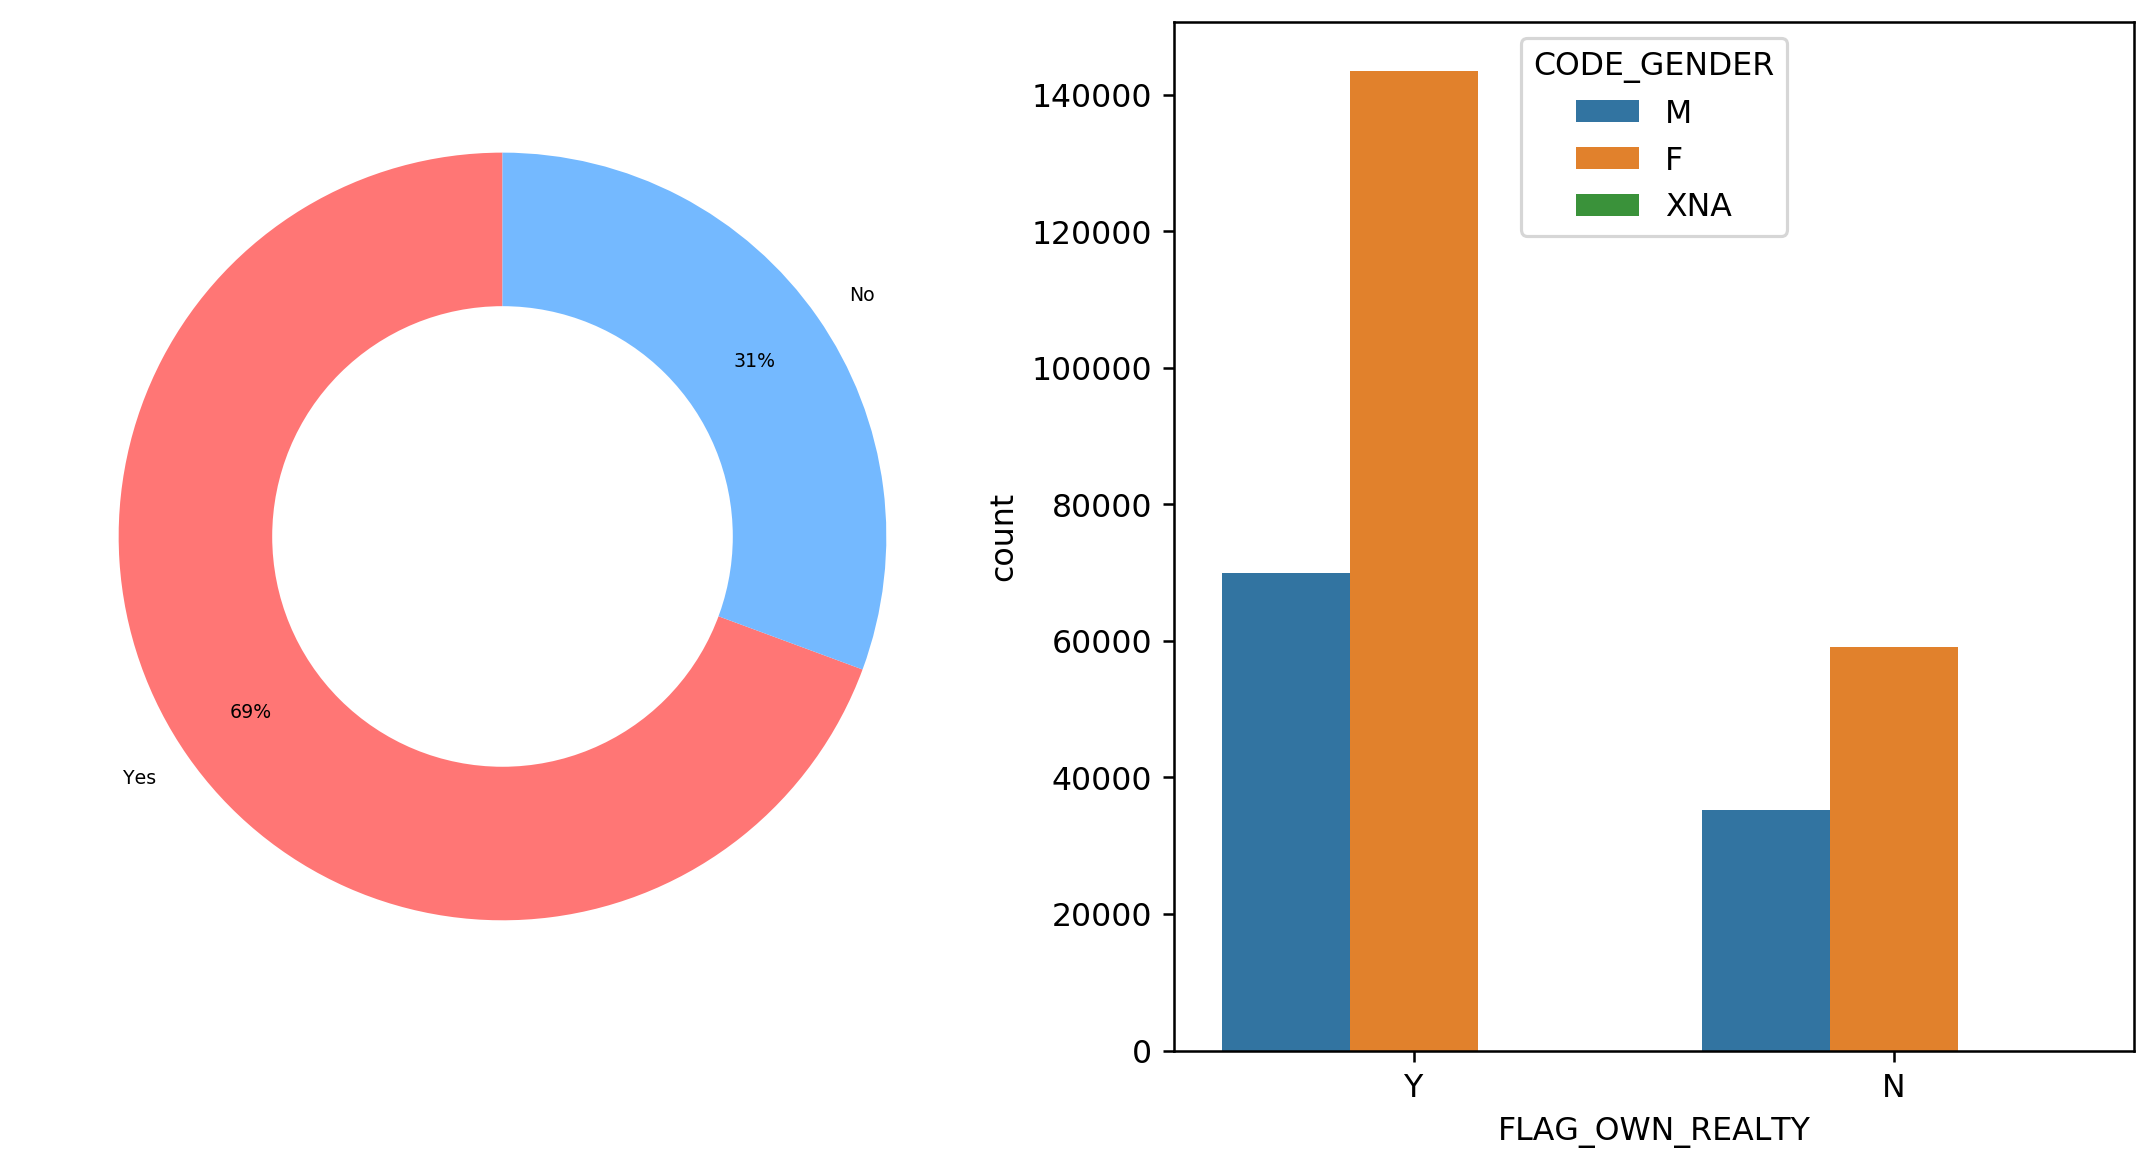

In [23]:

category_names = ['Yes', 'No']
sizes = [app_train.FLAG_OWN_REALTY.value_counts()[0], app_train.FLAG_OWN_REALTY.value_counts()[1]]
custom_colours = ['#ff7675', '#74b9ff']

plt.figure(figsize=(12, 6), dpi=227)
plt.subplot(1,2,1)
plt.pie(sizes, labels=category_names, textprops={'fontsize': 6}, startangle=90, 
       autopct='%1.0f%%', colors=custom_colours, pctdistance=0.8)

# draw circle
centre_circle = plt.Circle((0, 0), radius=0.6, fc='white')
plt.gca().add_artist(centre_circle)

plt.subplot(1,2,2)
sns.countplot(x='FLAG_OWN_REALTY', data=app_train,hue='CODE_GENDER')

plt.show()

#### Conclusion:Less number of females own cars and more number of females own Realty

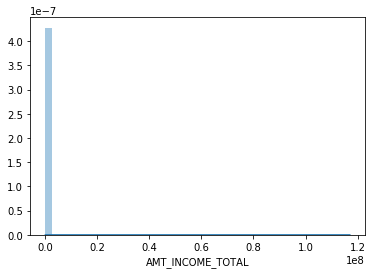

In [85]:
sns.distplot(app_train['AMT_INCOME_TOTAL'])

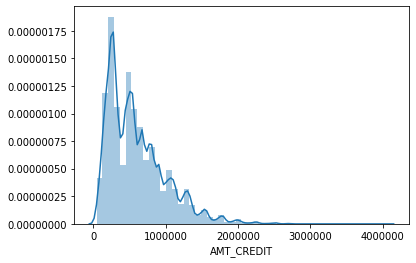

In [86]:
sns.distplot(app_train['AMT_CREDIT'])

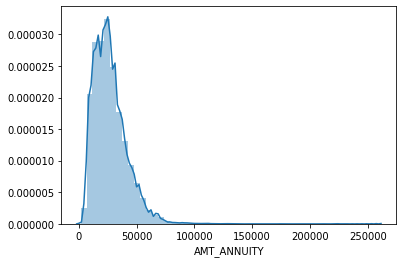

In [93]:
sns.distplot(app_train['AMT_ANNUITY'].dropna())

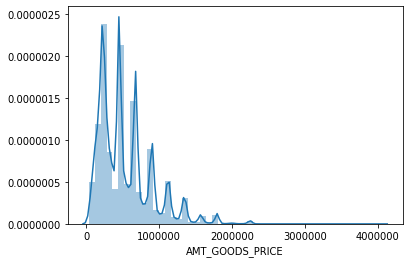

In [91]:
sns.distplot(app_train['AMT_GOODS_PRICE'].dropna())

### DAYS_BIRTH	Client's age in days at the time of application	, time only relative to the application

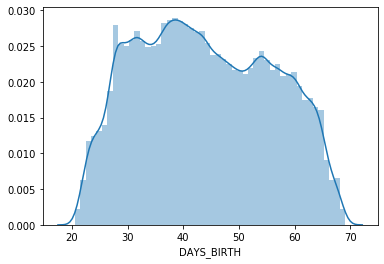

In [42]:
sns.distplot(app_train['DAYS_BIRTH']/-365)

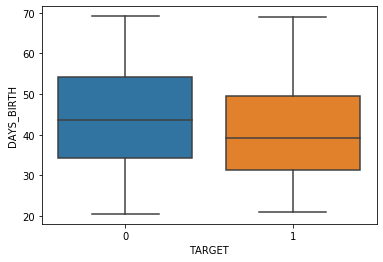

In [115]:
sns.boxplot(x=app_train['TARGET'] ,y=app_train['DAYS_BIRTH']/-365)

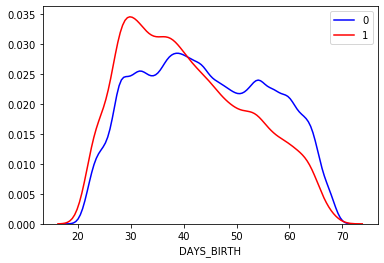

In [129]:
sns.distplot(app_train[app_train.TARGET==0]['DAYS_BIRTH']/-365,hist=False,color='Blue',label='0')
sns.distplot(app_train[app_train.TARGET==1]['DAYS_BIRTH']/-365,hist=False,color='Red',label='1')
plt.legend()

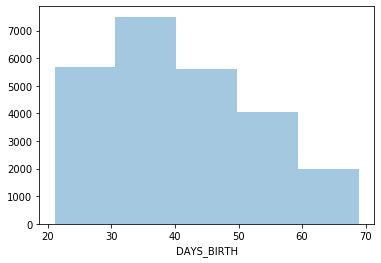

In [131]:
sns.distplot(app_train[app_train.TARGET==1]['DAYS_BIRTH']/-365,kde=False,bins=5)

In [127]:
app_train[app_train.TARGET==0]['DAYS_BIRTH']/-365

1         45.931507
2         52.180822
3         52.068493
4         54.608219
5         46.413699
            ...    
307505    66.805479
307506    25.553425
307507    56.917808
307508    41.002740
307510    46.180822
Name: DAYS_BIRTH, Length: 282686, dtype: float64

In [38]:
(app_train['DAYS_BIRTH']/-365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

#### DAYS_EMPLOYED	How many days before the application the person started current employment	, time only relative to the application


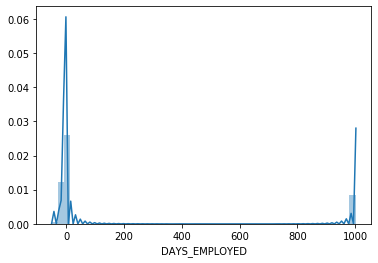

In [100]:
sns.distplot(app_train['DAYS_EMPLOYED']/365)

In [47]:
(app_train['DAYS_EMPLOYED']/365).describe()

count    307511.000000
mean        174.835742
std         387.056895
min         -49.073973
25%          -7.561644
50%          -3.323288
75%          -0.791781
max        1000.665753
Name: DAYS_EMPLOYED, dtype: float64

#### seems some issue in DAYS_EMPLOYED , there are few rows with value as 365243 let us ignore those values and check

In [5]:
days_employed_ref=(app_train['DAYS_EMPLOYED'])

In [6]:
(app_train['DAYS_EMPLOYED']==365243).sum()

55374

In [7]:
days_employed_ref.drop(days_employed_ref.index[(days_employed_ref==365243)],inplace=True)

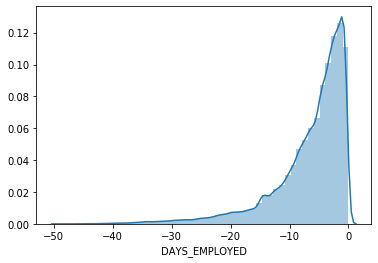

In [8]:
sns.distplot(days_employed_ref/365)

In [77]:
days_employed_ref.describe()

count    252137.000000
mean      -2384.169325
std        2338.360162
min      -17912.000000
25%       -3175.000000
50%       -1648.000000
75%        -767.000000
max           0.000000
Name: DAYS_EMPLOYED, dtype: float64

In [15]:
app_train.shape

(307511, 122)

In [16]:
app_test.shape

(48744, 121)

In [17]:
### best practice in such situations is to fill these number with nan , 
###inorder to preserve that we have made changes we can create a saprate column and copy the data in that 


app_train['DAYS_EMPLOYED_ANNONIMUS']=app_train['DAYS_EMPLOYED']
app_train['DAYS_EMPLOYED'].replace({365243:np.nan} , inplace=True)

In [104]:
app_train.DAYS_EMPLOYED.isnull().sum()

55374

In [18]:
### lets to the same with train set also inorder to make them syncronized

app_test['DAYS_EMPLOYED_ANNONIMUS']=app_test['DAYS_EMPLOYED']
app_test['DAYS_EMPLOYED'].replace({365243:np.nan} , inplace=True)

In [107]:
app_test['DAYS_EMPLOYED'].isnull().sum()

9274

In [19]:
app_train.shape

(307511, 123)

In [21]:
app_test.shape

(48744, 122)

### DAYS_REGISTRATION	How many days before the application did client change his registration

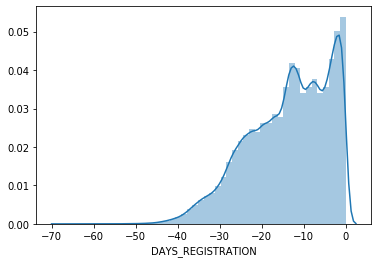

In [108]:
sns.distplot(app_train['DAYS_REGISTRATION']/365)

In [111]:
corr=app_train.corr()['TARGET'].sort_values()

In [112]:
corr.head(20)

EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED_ANNONIMUS      -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
ELEVATORS_AVG                -0.034199
ELEVATORS_MEDI               -0.033863
FLOORSMIN_AVG                -0.033614
FLOORSMIN_MEDI               -0.033394
LIVINGAREA_AVG               -0.032997
LIVINGAREA_MEDI              -0.032739
FLOORSMIN_MODE               -0.032698
TOTALAREA_MODE               -0.032596
ELEVATORS_MODE               -0.032131
LIVINGAREA_MODE              -0.030685
AMT_CREDIT                   -0.030369
Name: TARGET, dtype: float64

In [113]:
corr.tail(20)

CNT_FAM_MEMBERS                0.009308
CNT_CHILDREN                   0.019187
AMT_REQ_CREDIT_BUREAU_YEAR     0.019930
FLAG_WORK_PHONE                0.028524
DEF_60_CNT_SOCIAL_CIRCLE       0.031276
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
LIVE_CITY_NOT_WORK_CITY        0.032518
OWN_CAR_AGE                    0.037612
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_EMPLOYED                  0.074958
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

### DAYS_BIRTH	DAYS_EMPLOYED	DAYS_REGISTRATION have negative values so we need to make sure regarding the correlation as it will be opposite in sign


In [11]:
cordf=app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

In [12]:
cordf.corr()

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,-0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,-0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,-0.205478
DAYS_BIRTH,0.078239,-0.600610,-0.091996,-0.205478,1.000000


### All three EXT_SOURCE featureshave negative correlations with the target, indicating that as the value of the EXT_SOURCE increases, the client is more likely to repay the loan.

C:\Users\Sukhmeet\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Sukhmeet\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


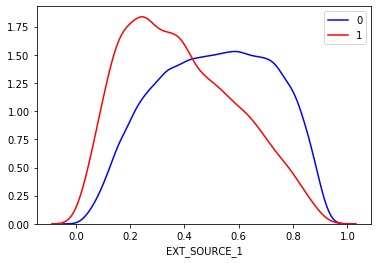

In [13]:

sns.distplot(app_train[app_train.TARGET==0]['EXT_SOURCE_1'],hist=False,color='Blue',label='0')
sns.distplot(app_train[app_train.TARGET==1]['EXT_SOURCE_1'],hist=False,color='Red',label='1')
plt.legend()

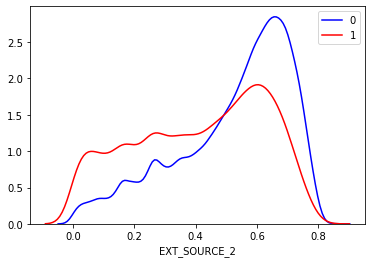

In [14]:
sns.distplot(app_train[app_train.TARGET==0]['EXT_SOURCE_2'],hist=False,color='Blue',label='0')
sns.distplot(app_train[app_train.TARGET==1]['EXT_SOURCE_2'],hist=False,color='Red',label='1')
plt.legend()

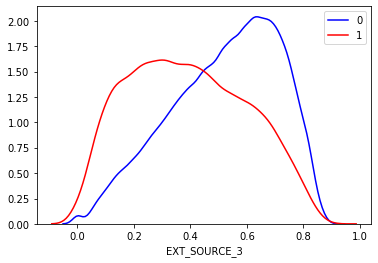

In [15]:
sns.distplot(app_train[app_train.TARGET==0]['EXT_SOURCE_3'],hist=False,color='Blue',label='0')
sns.distplot(app_train[app_train.TARGET==1]['EXT_SOURCE_3'],hist=False,color='Red',label='1')
plt.legend()

In [17]:
app_train.EXT_SOURCE_3.isnull().sum()

60965

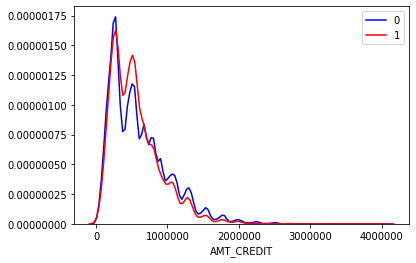

In [26]:
sns.distplot(app_train[app_train.TARGET==0]['AMT_CREDIT'],hist=False,color='Blue',label='0')
sns.distplot(app_train[app_train.TARGET==1]['AMT_CREDIT'],hist=False,color='Red',label='1')
plt.legend()

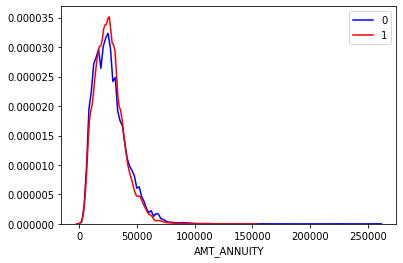

In [27]:
sns.distplot(app_train[app_train.TARGET==0]['AMT_ANNUITY'],hist=False,color='Blue',label='0')
sns.distplot(app_train[app_train.TARGET==1]['AMT_ANNUITY'],hist=False,color='Red',label='1')
plt.legend()

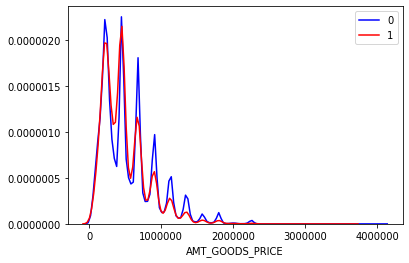

In [28]:
sns.distplot(app_train[app_train.TARGET==0]['AMT_GOODS_PRICE'],hist=False,color='Blue',label='0')
sns.distplot(app_train[app_train.TARGET==1]['AMT_GOODS_PRICE'],hist=False,color='Red',label='1')
plt.legend()

In [22]:
lab= LabelEncoder()
col_count=0
for i in app_train:
    if app_train[i].dtype=='O' and app_train[i].nunique()<=2:
        if app_train[i].isnull().any()==False:
            lab.fit(app_train[i])
            app_train[i]=lab.transform(app_train[i])
            app_test[i]=lab.transform(app_test[i])
            print(i)
            col_count+=1
            
print(col_count)


NAME_CONTRACT_TYPE
FLAG_OWN_CAR
FLAG_OWN_REALTY
3


In [24]:
app_test.shape

(48744, 122)

In [28]:
app_train = pd.get_dummies(app_train)

In [29]:
app_test = pd.get_dummies(app_test)

In [32]:
app_train.shape


(307511, 244)

In [33]:
app_test.shape

(48744, 240)

In [ ]:
## align the test and train data

In [34]:
target_feat=app_train['TARGET']

In [35]:
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

In [36]:
app_train['TARGET'] = target_feat

In [37]:
app_test.shape

(48744, 240)

In [38]:
app_train.shape

(307511, 241)

In [ ]:
## let us copy the train and test data in diff df and apply ML algo

In [39]:
train = app_train.drop(columns = ['TARGET'])

In [71]:
train_target=app_train['TARGET']

In [73]:
train_target.shape

(307511,)

In [74]:
train.shape

(307511, 240)

In [40]:
test = app_test.copy()

In [41]:
features = list(train.columns)


In [45]:
imputer = SimpleImputer(strategy = 'median')

In [47]:
imputer.fit(train)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [48]:
train = imputer.transform(train)
test = imputer.transform(test)

In [49]:
scaler = MinMaxScaler(feature_range = (0, 1))

In [50]:
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

In [153]:
trained=pd.DataFrame(train,columns=app_train.drop(columns = ['TARGET']).columns)

In [75]:
X_train, X_test , y_train , y_test = train_test_split(train,train_target,test_size=0.25 , random_state=10)

In [76]:
rf = RandomForestClassifier()

In [77]:
random_forest.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  4.8min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=50, verbose=1,
                       warm_start=False)

In [79]:
y_predict=random_forest.predict(X_test)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    4.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    8.1s finished


In [128]:
feature_imp=pd.DataFrame([app_train.drop(columns = ['TARGET']).columns,random_forest.feature_importances_],columns=app_train.drop(columns = ['TARGET']).columns)

In [129]:
feature_imp=feature_imp.T

In [136]:
feature_imp.sort_values(by=1,ascending=False,inplace=True)

In [170]:
feature_imp.iloc[:30][0].index

Index(['EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_ID_PUBLISH', 'DAYS_BIRTH',
       'DAYS_REGISTRATION', 'SK_ID_CURR', 'AMT_ANNUITY', 'DAYS_EMPLOYED',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_CREDIT', 'DAYS_EMPLOYED_ANNONIMUS',
       'AMT_INCOME_TOTAL', 'EXT_SOURCE_1', 'REGION_POPULATION_RELATIVE',
       'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'OWN_CAR_AGE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'CNT_FAM_MEMBERS', 'TOTALAREA_MODE',
       'LIVINGAREA_MODE', 'LIVINGAREA_MEDI', 'LIVINGAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BEGINEXPLUATATION_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'APARTMENTS_MEDI', 'CNT_CHILDREN'],
      dtype='object')

<Figure size 864x720 with 0 Axes>

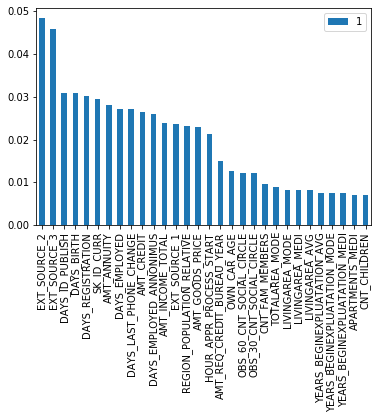

In [169]:
plt.figure(figsize=[12,10])
feature_imp.iloc[:30].plot.bar()

In [171]:
x1=trained[['EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_ID_PUBLISH', 'DAYS_BIRTH',
       'DAYS_REGISTRATION', 'SK_ID_CURR', 'AMT_ANNUITY', 'DAYS_EMPLOYED',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_CREDIT', 'DAYS_EMPLOYED_ANNONIMUS',
       'AMT_INCOME_TOTAL', 'EXT_SOURCE_1', 'REGION_POPULATION_RELATIVE',
       'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'OWN_CAR_AGE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'CNT_FAM_MEMBERS', 'TOTALAREA_MODE',
       'LIVINGAREA_MODE', 'LIVINGAREA_MEDI', 'LIVINGAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BEGINEXPLUATATION_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'APARTMENTS_MEDI', 'CNT_CHILDREN']]

In [172]:
X_train, X_test , y_train , y_test = train_test_split(x1,train_target,test_size=0.25 , random_state=10)

In [173]:
random_forest.fit(X_train,y_train)
y_pred_new = random_forest.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  4.8min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    2.1s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    4.3s finished


In [174]:
cm=confusion_matrix(y_test,y_pred_new)

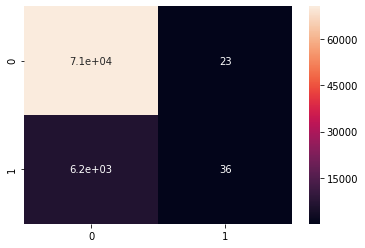

In [175]:
sns.heatmap(cm , annot=True)

In [176]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     70668
           1       0.60      0.00      0.00      6210

    accuracy                           0.92     76878
   macro avg       0.76      0.50      0.48     76878
weighted avg       0.89      0.92      0.88     76878



In [177]:
rf_probs = random_forest.predict_proba(X_test)[:, 1]

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    1.9s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    4.1s finished


In [178]:
roc_value = roc_auc_score(y_test, rf_probs)

In [179]:
roc_value

0.7037791534696228

In [197]:
random_forest.score(X_test,y_test)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   18.4s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:   32.3s finished


0.9193917635734541

In [18]:
app_train_domain = app_train.copy()
app_test_domain = app_test.copy()

In [19]:
app_train_domain['DAYS_BIRTH']=abs(app_train_domain['DAYS_BIRTH'])


In [21]:
app_train_domain['CREDIT_INCOME_PERCENT'] = app_train_domain['AMT_CREDIT'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['ANNUITY_INCOME_PERCENT'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['CREDIT_TERM'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_CREDIT']
app_train_domain['DAYS_EMPLOYED_PERCENT'] = app_train_domain['DAYS_EMPLOYED'] / app_train_domain['DAYS_BIRTH']

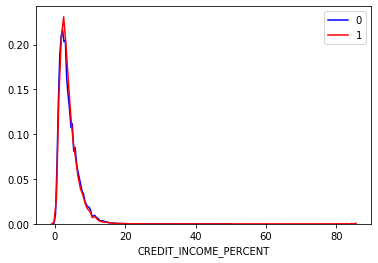

In [22]:
sns.distplot(app_train_domain[app_train_domain.TARGET==0]['CREDIT_INCOME_PERCENT'],hist=False,color='Blue',label='0')
sns.distplot(app_train_domain[app_train_domain.TARGET==1]['CREDIT_INCOME_PERCENT'],hist=False,color='Red',label='1')
plt.legend()

C:\Users\Sukhmeet\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Sukhmeet\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


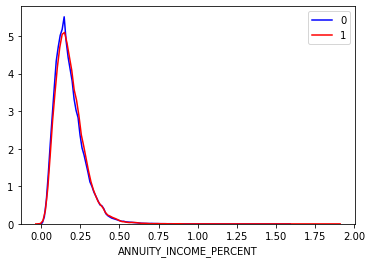

In [23]:
sns.distplot(app_train_domain[app_train_domain.TARGET==0]['ANNUITY_INCOME_PERCENT'],hist=False,color='Blue',label='0')
sns.distplot(app_train_domain[app_train_domain.TARGET==1]['ANNUITY_INCOME_PERCENT'],hist=False,color='Red',label='1')
plt.legend()

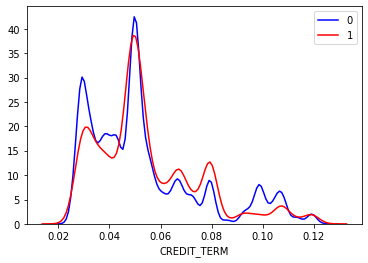

In [24]:
sns.distplot(app_train_domain[app_train_domain.TARGET==0]['CREDIT_TERM'],hist=False,color='Blue',label='0')
sns.distplot(app_train_domain[app_train_domain.TARGET==1]['CREDIT_TERM'],hist=False,color='Red',label='1')
plt.legend()

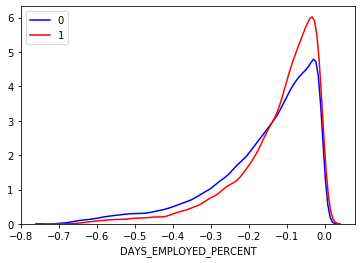

In [25]:
sns.distplot(app_train_domain[app_train_domain.TARGET==0]['DAYS_EMPLOYED_PERCENT'],hist=False,color='Blue',label='0')
sns.distplot(app_train_domain[app_train_domain.TARGET==1]['DAYS_EMPLOYED_PERCENT'],hist=False,color='Red',label='1')
plt.legend()

## Polynomial Features

In [29]:
poly_features = app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]
poly_features_test = app_test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

In [35]:
from sklearn import impute

In [42]:
imputer=impute.SimpleImputer(strategy='median')

In [37]:
imputer

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='Median', verbose=0)

In [38]:
poly_target = poly_features['TARGET']

In [39]:
poly_features = poly_features.drop(columns = ['TARGET'])

In [40]:
poly_features.isnull().sum()

EXT_SOURCE_1    173378
EXT_SOURCE_2       660
EXT_SOURCE_3     60965
DAYS_BIRTH           0
dtype: int64

In [43]:
poly_features = imputer.fit_transform(poly_features)

In [46]:
poly_features_test = imputer.transform(poly_features_test)

In [47]:
from sklearn.preprocessing import PolynomialFeatures

In [48]:
poly_transformer = PolynomialFeatures(degree = 3)


In [49]:
poly_transformer.fit(poly_features)

PolynomialFeatures(degree=3, include_bias=True, interaction_only=False,
                   order='C')

In [50]:
poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)

In [52]:
poly_features.shape

(307511, 35)

In [54]:
poly_transformer.get_feature_names(input_features = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])

['1',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_BIRTH',
 'EXT_SOURCE_1^2',
 'EXT_SOURCE_1 EXT_SOURCE_2',
 'EXT_SOURCE_1 EXT_SOURCE_3',
 'EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_2^2',
 'EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_3^2',
 'EXT_SOURCE_3 DAYS_BIRTH',
 'DAYS_BIRTH^2',
 'EXT_SOURCE_1^3',
 'EXT_SOURCE_1^2 EXT_SOURCE_2',
 'EXT_SOURCE_1^2 EXT_SOURCE_3',
 'EXT_SOURCE_1^2 DAYS_BIRTH',
 'EXT_SOURCE_1 EXT_SOURCE_2^2',
 'EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_1 EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_1 EXT_SOURCE_3^2',
 'EXT_SOURCE_1 EXT_SOURCE_3 DAYS_BIRTH',
 'EXT_SOURCE_1 DAYS_BIRTH^2',
 'EXT_SOURCE_2^3',
 'EXT_SOURCE_2^2 EXT_SOURCE_3',
 'EXT_SOURCE_2^2 DAYS_BIRTH',
 'EXT_SOURCE_2 EXT_SOURCE_3^2',
 'EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH',
 'EXT_SOURCE_2 DAYS_BIRTH^2',
 'EXT_SOURCE_3^3',
 'EXT_SOURCE_3^2 DAYS_BIRTH',
 'EXT_SOURCE_3 DAYS_BIRTH^2',
 'DAYS_BIRTH^3']

In [56]:
poly_features=pd.DataFrame(poly_features,columns=poly_transformer.get_feature_names(input_features =
                                                                                    ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']))

In [57]:
poly_features['TARGET'] = poly_target

In [58]:
poly_features

,1,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,EXT_SOURCE_1^2,EXT_SOURCE_1 EXT_SOURCE_2,EXT_SOURCE_1 EXT_SOURCE_3,EXT_SOURCE_1 DAYS_BIRTH,EXT_SOURCE_2^2,...,EXT_SOURCE_2^2 EXT_SOURCE_3,EXT_SOURCE_2^2 DAYS_BIRTH,EXT_SOURCE_2 EXT_SOURCE_3^2,EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH,EXT_SOURCE_2 DAYS_BIRTH^2,EXT_SOURCE_3^3,EXT_SOURCE_3^2 DAYS_BIRTH,EXT_SOURCE_3 DAYS_BIRTH^2,DAYS_BIRTH^3,TARGET
0,1.0,0.083037,0.262949,0.139376,-9461.0,0.006895,0.021834,0.011573,-785.612748,0.069142,...,0.009637,-654.152107,0.005108,-346.733022,2.353667e+07,0.002707,-183.785678,1.247560e+07,-8.468590e+11,1
1,1.0,0.311267,0.622246,0.535276,-16765.0,0.096887,0.193685,0.166614,-5218.396475,0.387190,...,0.207254,-6491.237078,0.178286,-5583.975307,1.748916e+08,0.153368,-4803.518937,1.504475e+08,-4.712058e+12,0
2,1.0,0.505998,0.555912,0.729567,-19046.0,0.256034,0.281290,0.369159,-9637.236584,0.309038,...,0.225464,-5885.942404,0.295894,-7724.580288,2.016572e+08,0.388325,-10137.567875,2.646504e+08,-6.908939e+12,0
3,1.0,0.505998,0.650442,0.535276,-19005.0,0.256034,0.329122,0.270849,-9616.490669,0.423074,...,0.226462,-8040.528832,0.186365,-6616.894625,2.349331e+08,0.153368,-5445.325225,1.933364e+08,-6.864416e+12,0
4,1.0,0.505998,0.322738,0.535276,-19932.0,0.256034,0.163305,0.270849,-10085.550751,0.104160,...,0.055754,-2076.117157,0.092471,-3443.335521,1.282190e+08,0.153368,-5710.929881,2.126570e+08,-7.918677e+12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,1.0,0.145570,0.681632,0.535276,-9327.0,0.021191,0.099226,0.077920,-1357.735625,0.464623,...,0.248701,-4333.535804,0.195302,-3403.064320,5.929720e+07,0.153368,-2672.378236,4.656525e+07,-8.113830e+11,0
307507,1.0,0.505998,0.115992,0.535276,-20775.0,0.256034,0.058692,0.270849,-10512.107006,0.013454,...,0.007202,-279.510194,0.033234,-1289.874083,5.006225e+07,0.153368,-5952.466801,2.310256e+08,-8.966503e+12,0
307508,1.0,0.744026,0.535722,0.218859,-14966.0,0.553575,0.398591,0.162837,-11135.099105,0.286998,...,0.062812,-4295.209004,0.025661,-1754.727146,1.199916e+08,0.010483,-716.860892,4.902031e+07,-3.352102e+12,0
307509,1.0,0.505998,0.514163,0.661024,-11961.0,0.256034,0.260165,0.334477,-6052.241247,0.264363,...,0.174750,-3162.050698,0.224665,-4065.229651,7.355897e+07,0.288836,-5226.384299,9.456968e+07,-1.711207e+12,1


In [59]:
poly_corrs = poly_features.corr()['TARGET'].sort_values()

In [60]:
poly_corrs.head()

EXT_SOURCE_2 EXT_SOURCE_3                -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189605
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176428
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172282
EXT_SOURCE_1 EXT_SOURCE_2                -0.166625
Name: TARGET, dtype: float64

In [61]:
poly_corrs.tail()

EXT_SOURCE_1 EXT_SOURCE_2 DAYS_BIRTH    0.155891
EXT_SOURCE_2 DAYS_BIRTH                 0.156873
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH    0.181283
TARGET                                  1.000000
1                                            NaN
Name: TARGET, dtype: float64

In [62]:
# Put test features into dataframe
poly_features_test = pd.DataFrame(poly_features_test, 
                                  columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                                'EXT_SOURCE_3', 'DAYS_BIRTH']))

In [64]:
# Merge polynomial features into training dataframe
poly_features['SK_ID_CURR'] = app_train['SK_ID_CURR']
app_train_poly = app_train.merge(poly_features, on = 'SK_ID_CURR', how = 'left')

In [66]:
# Merge polnomial features into testing dataframe
poly_features_test['SK_ID_CURR'] = app_test['SK_ID_CURR']
app_test_poly = app_test.merge(poly_features_test, on = 'SK_ID_CURR', how = 'left')

In [68]:
app_train_poly.shape

(307511, 159)

In [69]:
app_test_poly.shape

(48744, 157)

In [70]:
# Align the dataframes
app_train_poly, app_test_poly = app_train_poly.align(app_test_poly, join = 'inner', axis = 1)

In [71]:
app_train_poly.shape

(307511, 157)

In [72]:
app_test_poly.shape

(48744, 157)